In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utide import solve
sys.path.append('/home/manu/TFG_repo/scripts')

In [4]:
from config import data_dir
from analysis_routines import *
from ploting_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [5]:
#df_fit = load_SHDR_fit('SHDR_trials/test_a2cond_ci.csv')
df_fit = load_SHDR_fit('SHDR_trials/test_dws_a2cond_ci.csv')
temp, pres, date = load_time_series('test/test_deep_wint_short.nc')

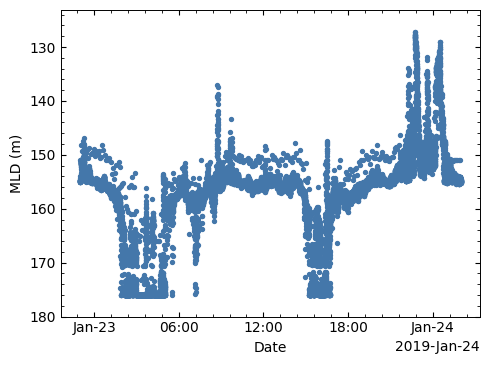

In [6]:
plot_fit_variable(df_fit, 'D1')

In [16]:
df_dwcond = load_SHDR_fit('SHDR_trials/test_dw_a2cond_c.csv')
df_dwcondi = load_SHDR_fit('SHDR_trials/test_dw_a2cond_ci.csv')
temp_dw, pres_dw, date_dw = load_time_series('test/test_deep_wint.nc')

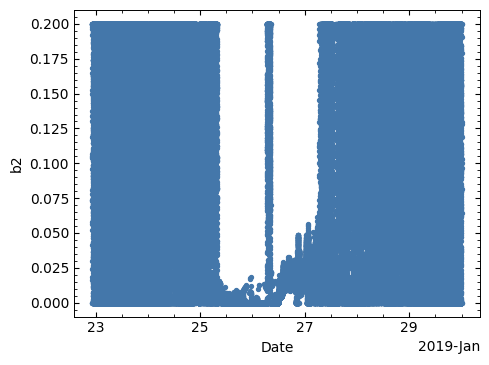

In [21]:
plot_fit_variable(df_dwcond, 'b2')

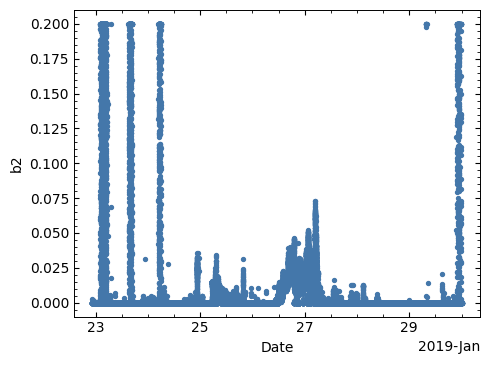

In [20]:
plot_fit_variable(df_dwcondi, 'b2')

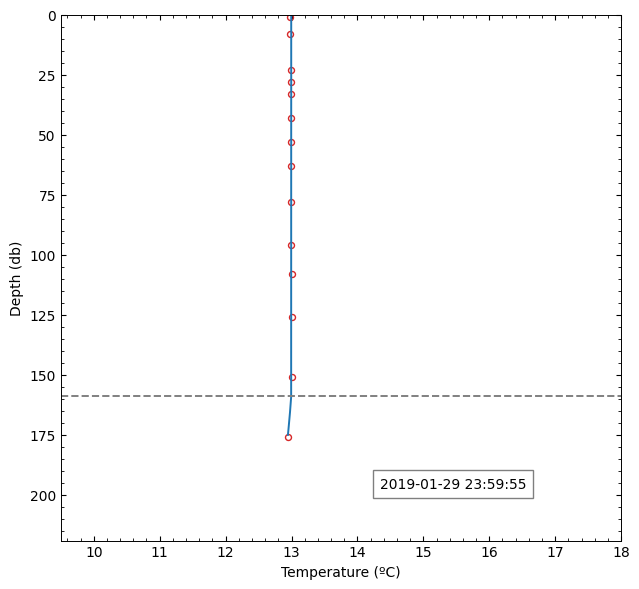

In [22]:
animate_profile_evolution(df_dwcondi, temp_dw, pres_dw, 'dwcondi.mp4')

In [8]:
df_dwfree = load_SHDR_fit('SHDR_trials/test_dw_a2free_ci.csv')

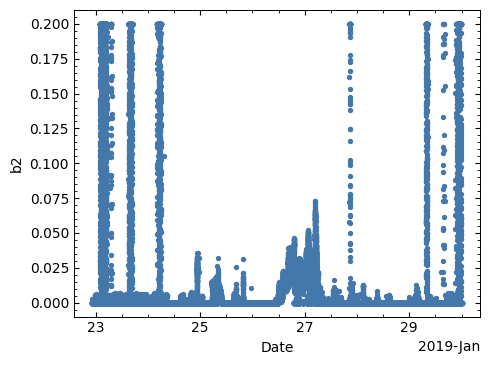

In [10]:
plot_fit_variable(df_dwfree, 'b2')

In [11]:
#utide
def coef_dataframe(date, value, lat=43.789):
    coef = solve(date, value, lat=lat, nodal=True, verbose=False)
    columns = ['A', 'A_ci', 'g', 'g_ci']
    data_dict = dict((k, coef[k]) for k in ['name', 'A', 'A_ci', 'g', 'g_ci', 'PE', 'SNR'] if k in coef)
    df = pd.DataFrame(data_dict)
    df.insert(1, 'period', 1/coef.aux['frq'])
    return df


In [14]:
df_coef = coef_dataframe(date_dw, df_dwfree['b2'])

In [15]:
df_coef

,name,period,A,A_ci,g,g_ci,PE,SNR
0,M2,12.420601,0.006479,0.002712,59.742228,24.069614,48.904321,21.920370
1,M4,6.210301,0.004456,0.001786,117.132823,22.965905,23.128123,23.922489
2,K1,23.934470,0.003304,0.002165,57.649290,37.343173,12.716572,8.947235
3,M3,8.280401,0.002125,0.000966,73.956692,26.053621,5.261386,18.589942
4,2MK5,4.930880,0.001787,0.001191,211.030044,38.145358,3.719371,8.650380
5,M6,4.140200,0.001616,0.001319,173.956730,46.784700,3.040244,5.766948
6,3MK7,3.529641,0.001572,0.001002,331.836994,36.504976,2.878405,9.455593
7,M8,3.105150,0.000549,0.000526,249.937876,54.725312,0.351577,4.198068


In [22]:
df_ss_ci = load_SHDR_fit('SHDR_trials/test_ss_a2cond_ci.csv')
df_ssf_ci = load_SHDR_fit('SHDR_trials/test_ss_a2condown_ci.csv')
temp_ss, pres_ss, date_ss = load_time_series('test/test_spring_short.nc')

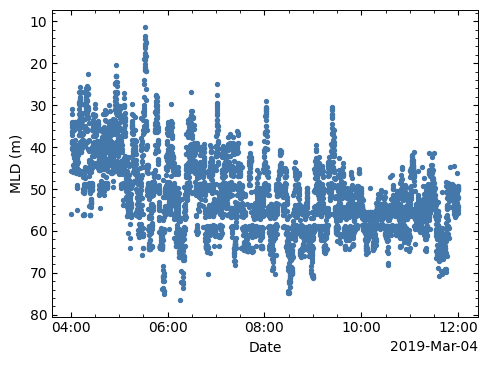

In [8]:
plot_fit_variable(df_ss_ci, 'D1')

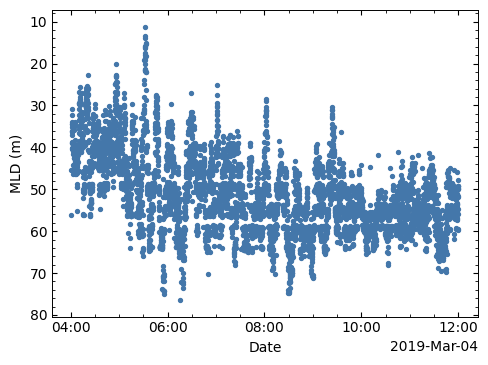

In [9]:
plot_fit_variable(df_ssf_ci, 'D1')

1871


/home/manu/TFG_repo/scripts/analysis_routines.py:100: RuntimeWarning: overflow encountered in exp
  return a1 + pos * (b3 * (z - D1) + a2 *(np.exp(zaux) - 1.0))


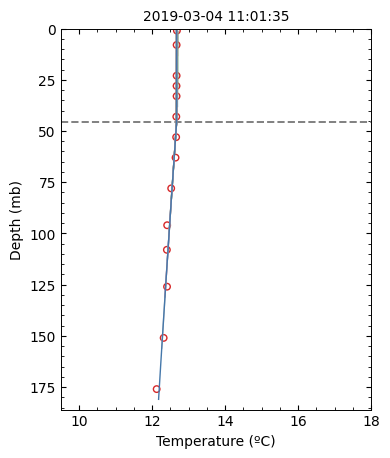

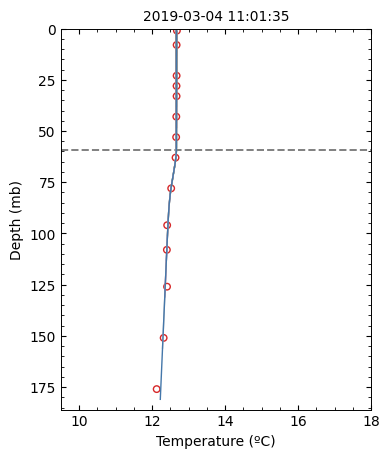

(0.026057391141800966, 0.004056400471715125)


In [20]:
print(np.argmax(df_ssf_ci['D1'] - df_ss_ci['D1']))
plot_profile_fit(df_ss_ci, temp_ss, pres_ss, 5047)
plot_profile_fit(df_ssf_ci, temp_ss, pres_ss, 5047)

In [23]:
print(mean_and_std(df_ssf_ci, 'em'))
print(mean_and_std(df_ss_ci, 'em'))

(0.026069182546626705, 0.004061258836151385)
(0.026057391141800966, 0.004056400471715125)


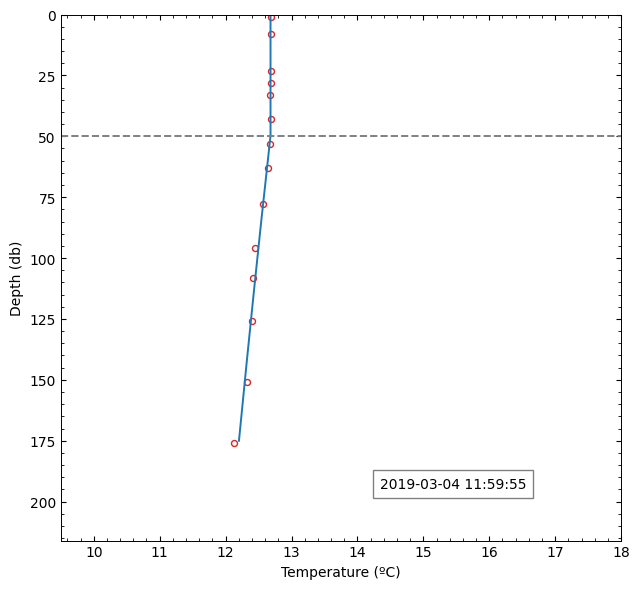

In [29]:
animate_profile_evolution(df_ss_ci, temp_ss, pres_ss, 'ss_ci.mp4')

In [35]:
temp_1, pres_1, date_1 = load_time_series('test/test_1.nc')
df1_a2down = load_SHDR_fit('SHDR_trials/test_1_a2condown_ci.csv')
df1_a2free = load_SHDR_fit('SHDR_trials/test_1_a2free_ci.csv')
df1_a2cond = load_SHDR_fit('SHDR_trials/test_1_a2cond_ci.csv')

In [39]:
print(mean_and_std(df1_a2down, 'em'))
print(mean_and_std(df1_a2free, 'em'))
print(mean_and_std(df1_a2cond, 'em'))
print(distance(df1_a2down, 'D1', 1, 10)[1])
print(distance(df1_a2free, 'D1', 1, 10)[1])
print(distance(df1_a2cond, 'D1', 1, 10)[1])

(0.07018617512694476, 0.02617632516156477)
(0.07019117922214652, 0.026177046160813452)
(0.07018630449688745, 0.026175424559093566)
0.0013227513227513227
0.0008558979147214441
0.0010115157173980704


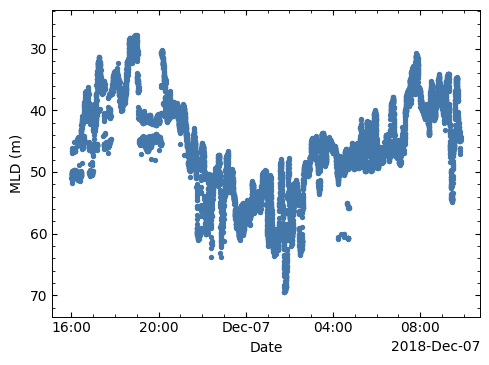

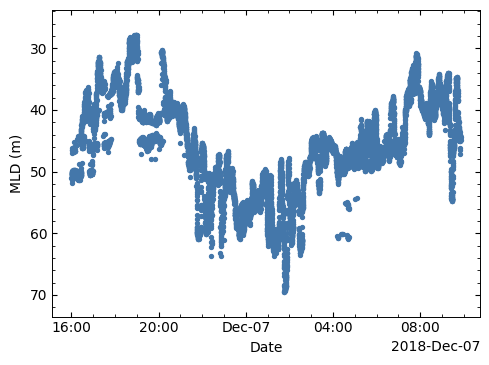

In [41]:
plot_fit_variable(df1_a2cond, 'D1')
plot_fit_variable(df1_a2free, 'D1')

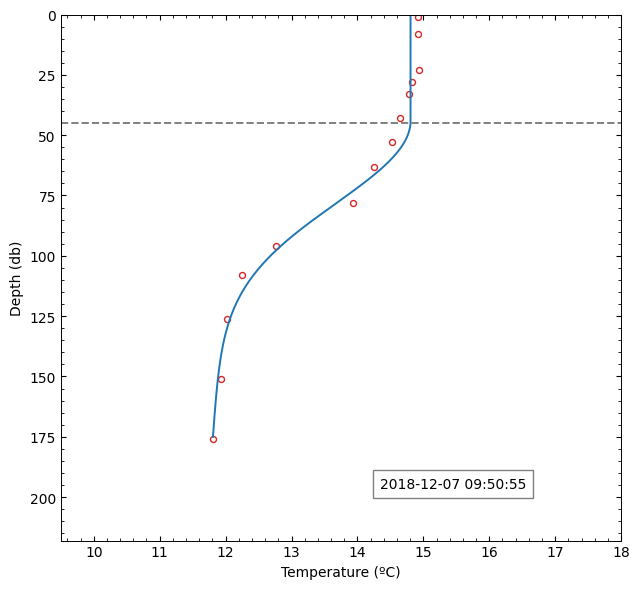

In [34]:
animate_profile_evolution(df1_a2free, temp_1, pres_1, '1a2free.mp4')